# 0. Data Description
1. train.jsonl - 학습에 사용 할 데이터셋

- media : 기사 미디어

- id : 각 데이터 고유 번호

- article_original : 전체 기사 내용, 문장별로 split되어 있음

- abstractive : 사람이 생성한 요약문

- extractive : 사람이 추출한 요약문 3개의 index

\\

2. abstractive_test.jsonl - 추론할 데이터셋

- media : 기사 미디어

- id : 각 데이터 고유 번호

- article_original : 전체 기사 내용, 문장별로 split되어 있음

\\

3. abstractive_sample_submission.csv - abstractive_test.jsonl의 추론 결과를 작성하여 제출

- id : abstractive_test.jsonl 데이터의 고유 번호

- summary : 모델이 추론한 문장



# 1. 사전 환경 준비 (Mecab, data 준비)

In [3]:
# 경로 확인
print(os.getcwd())


/content


In [1]:
import os
print(os.getcwd())
os.chdir('./drive/MyDrive/Dacon/Dacon_KoreanDocumentGenerationSummary')
print(os.getcwd())

/content
/content/drive/MyDrive/Dacon/Dacon_KoreanDocumentGenerationSummary


In [ ]:
# Colab에서 Mecab을 쓰기 위한 git clone
# 한번 실행해놓으면 clone은 완료됨.
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git


fatal: destination path 'Mecab-ko-for-Google-Colab' already exists and is not an empty directory.


In [5]:
!ls

00_Practice_Word2Vec_Embedding.ipynb  df_w2v_500_tsne_result.csv
01_Practice_Glove_Embedding.ipynb     Mecab-ko-for-Google-Colab
abstractive_sample_submission_v2.csv  Save_W2v_model
abstractive_test_v2.jsonl	      train.jsonl


shell bash 설치를 위해서 git clone을 통해 받은 Mecab Colab 폴더로 이동


In [14]:
cd Mecab-ko-for-Google-Colab/

/content/drive/My Drive/Dacon/Dacon_KoreanDocumentGenerationSummary/Mecab-ko-for-Google-Colab


In [15]:
# Notebook을 끄고 킬 때마다 실행해줘야하는 설치 부분.
! bash install_mecab-ko_on_colab190912.sh

Installing konlpy.....
     |████████████████████████████████| 19.4MB 1.4MB/s 
     |████████████████████████████████| 92kB 8.7MB/s 
     |████████████████████████████████| 460kB 50.2MB/s 
  Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3
  Found existing installation: tweepy 3.6.0
    Uninstalling tweepy-3.6.0:
      Successfully uninstalled tweepy-3.6.0
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2021-02-14 21:39:38--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::34cc:ea4a, 2406:da00:ff00::22e9:9f55, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://bbuseruploads.s3.amazonaws.com/eunjeon/mecab-ko/downloa

In [16]:
from konlpy.tag import Mecab
mecab = Mecab()
text = u"""이제 구글 코랩에서 Mecab-ko라이브러리 사용이 가능합니다. 읽어주셔서 감사합니다."""
nouns = mecab.nouns(text)
print(nouns)

['구글', '코', '랩', '라이브러리', '사용', '가능', '감사']


In [64]:
# 한글깨짐현상 해결 -> 나눔 폰트 설치하기 (Nanum)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,639 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 146722 files and di

In [2]:
import sys
import warnings
import numpy as np
import pandas as pd
import json
from tqdm import tqdm_notebook as tqdm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# matplotlib 설정

matplotlib.rc('font', family='AppleGothic') # 한글 출력

plt.rcParams['axes.unicode_minus'] = False # 축 - 설정


import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

warnings.filterwarnings(action='ignore')


In [18]:
cd ..

/content/drive/My Drive/Dacon/Dacon_KoreanDocumentGenerationSummary


In [19]:
with open('train.jsonl', 'r') as json_file:
    json_list = list(json_file)

trains = []
for json_str in json_list:
    line = json.loads(json_str)
    trains.append(line)

train_df = pd.DataFrame(trains)
train_df.head()


,media,id,article_original,abstractive,extractive
0,당진시대,327827480,[당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것...,지난 6일 당진시의회 행정사무감사에서 '합창단이 소리를 작게 낼 것이니 알고 있으라...,"[0, 1, 2]"
1,국제신문,339840364,[미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있...,LA 에인절스의 최지만이 맹활약을 하여 시즌 타율 0.250에서 0.313으로 올리...,"[0, 1, 3]"
2,기호일보,371071597,"[인천 부영공원 운영 생활야구협회 80여 동호회 팀에 260만 원씩 받아, 국유지로...",16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가 ...,"[6, 7, 10]"
3,대구일보,354806783,[대구·경북첨단의료산업진흥재단 의약생산센터는 항암주사제 무균충전 시설을 갖추고 있다...,대구·경북첨단의료산업진흥재단 의약생산센터는 약사법 시행규칙에서 정한 바에 따라 전용...,"[1, 6, 4]"
4,대구신문,347022773,[국내 유통되는 탄산음료 중 식품의약품안전처에 품질인증을 받은 제품이 하나도 없는 ...,식품의약품안전처는 29일 어린이가 즐겨마시는 음료를 대상으로 영양성분을 조사한 결과...,"[2, 3, 10]"


In [20]:
train_df['extractive_sents'] = train_df.apply(lambda row: list(np.array(row['article_original'])[row['extractive']]) , axis=1)
train_df['no_extractive_sents'] = train_df.apply(lambda row: [sent for sent in row['article_original'] if sent not in row['extractive_sents']] , axis=1)
train_df.head()


,media,id,article_original,abstractive,extractive,extractive_sents,no_extractive_sents
0,당진시대,327827480,[당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것...,지난 6일 당진시의회 행정사무감사에서 '합창단이 소리를 작게 낼 것이니 알고 있으라...,"[0, 1, 2]",[당진시 문화관광과를 대상으로 하는 행정사무감사에서 당진시립합창단 관계자가 보낸 것...,"[문제의 문자메세지를 전달받은 문화관광과는 감사법무담당관에게 조사를 의뢰했다., 권..."
1,국제신문,339840364,[미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있...,LA 에인절스의 최지만이 맹활약을 하여 시즌 타율 0.250에서 0.313으로 올리...,"[0, 1, 3]",[미국 메이저리그(MLB)에서 활동하는 한국 선수들의 시즌 초반 희비가 엇갈리고 있...,[최지만은 2일(한국시간) 미국 플로리다주 세인트피터즈버그 트로피카나 필드에서 열린...
2,기호일보,371071597,"[인천 부영공원 운영 생활야구협회 80여 동호회 팀에 260만 원씩 받아, 국유지로...",16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가 ...,"[6, 7, 10]",[16일 부평구와 협회 등에 따르면 부영공원 안에 있는 야구장을 구생활체육야구협회가...,"[인천 부영공원 운영 생활야구협회 80여 동호회 팀에 260만 원씩 받아, 국유지로..."
3,대구일보,354806783,[대구·경북첨단의료산업진흥재단 의약생산센터는 항암주사제 무균충전 시설을 갖추고 있다...,대구·경북첨단의료산업진흥재단 의약생산센터는 약사법 시행규칙에서 정한 바에 따라 전용...,"[1, 6, 4]",[대구·경북첨단의료산업진흥재단(이하 대구첨복재단) 의약생산센터는 주세제 특수제제인 ...,[대구·경북첨단의료산업진흥재단 의약생산센터는 항암주사제 무균충전 시설을 갖추고 있다...
4,대구신문,347022773,[국내 유통되는 탄산음료 중 식품의약품안전처에 품질인증을 받은 제품이 하나도 없는 ...,식품의약품안전처는 29일 어린이가 즐겨마시는 음료를 대상으로 영양성분을 조사한 결과...,"[2, 3, 10]",[식품의약품안전처는 29일 여름철 어린이가 즐겨 마시는 탄산음료 282개와 혼합음료...,[국내 유통되는 탄산음료 중 식품의약품안전처에 품질인증을 받은 제품이 하나도 없는 ...


In [21]:
train_df['media'].value_counts()


기호일보      7166
국제신문      6678
대전일보      4831
광주일보      4155
남도일보      4148
광주매일신문    3783
대구신문      3750
대구일보      3060
경기일보      2319
당진시대      2014
광양신문       899
Name: media, dtype: int64

In [22]:
len(train_df['article_original'])

42803

In [23]:
# Mecab 형태소분석기
from konlpy.tag import Mecab  
mecab=Mecab()

result = []

for article in tqdm(train_df['article_original']):
    for line in article:
        tokenlist = mecab.nouns(line)
        result.append(tokenlist)


In [ ]:
print(f'총 문장의 개수 : {len(result)}')

총 문장의 개수 : 567422


In [48]:
# 총 단어의 갯수
from collections import Counter
from itertools import chain
count = Counter(chain(*result))
len(count)

94056

# 2. Mecab tokenizing 이후 Glove 적용해보기

In [26]:
!pip install glove_python

     |████████████████████████████████| 266kB 5.7MB/s 
  Created wheel for glove-python: filename=glove_python-0.1.0-cp36-cp36m-linux_x86_64.whl size=700233 sha256=84e8d4442e2c3e3b8a79cfac2ceceab55978ce146574bbd76601da9f1f94e919
  Stored in directory: /root/.cache/pip/wheels/88/4b/6d/10c0d2ad32c9d9d68beec9694a6f0b6e83ab1662a90a089a4b
Successfully built glove-python


In [27]:
from glove import Corpus, Glove

corpus = Corpus() 
corpus.fit(result, window=5)
# 훈련 데이터로부터 GloVe에서 사용할 동시 등장 행렬 생성


In [33]:
#corpus.dictionary
corpus.matrix

<94056x94056 sparse matrix of type '<class 'numpy.float64'>'
	with 10683210 stored elements in COOrdinate format>

In [34]:
glove = Glove(no_components=100, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=20, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
# 학습에 이용할 쓰레드의 개수는 4로 설정, 에포크는 20.


Performing 20 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19


In [35]:
# 관련성 높은 단어들 찾아보기
model_result = glove.most_similar("선거")
print(model_result)

'''
Word2Vec의 '선거' 유사단어 찾기 결과 : 
[('경선', 0.6715423464775085), ('선관위', 0.6373474597930908), ('공천', 0.6309963464736938), ('선출', 0.623529851436615), ('총선', 0.609582781791687), ('선거관리위원회', 0.5875794887542725), ('당선', 0.5848677754402161), ('유세', 0.5716328620910645), ('선거일', 0.5648616552352905), ('선거인', 0.5625284910202026)]
'''

[('보궐', 0.757342447701977), ('운동원', 0.7380044851746637), ('조합장', 0.6854370000275314), ('참패', 0.683599402857782)]


"\nWord2Vec의 '선거' 유사단어 찾기 결과 : \n[('경선', 0.6715423464775085), ('선관위', 0.6373474597930908), ('공천', 0.6309963464736938), ('선출', 0.623529851436615), ('총선', 0.609582781791687), ('선거관리위원회', 0.5875794887542725), ('당선', 0.5848677754402161), ('유세', 0.5716328620910645), ('선거일', 0.5648616552352905), ('선거인', 0.5625284910202026)]\n"

[('경선', 0.6715423464775085), ('선관위', 0.6373474597930908), ('공천', 0.6309963464736938), ('선출', 0.623529851436615), ('총선', 0.609582781791687), ('선거관리위원회', 0.5875794887542725), ('당선', 0.5848677754402161), ('유세', 0.5716328620910645), ('선거일', 0.5648616552352905), ('선거인', 0.5625284910202026)]


In [37]:
#os.makedirs('./Save_glove_model')

In [39]:
ls

00_Practice_Word2Vec_Embedding.ipynb  Mecab-ko-for-Google-Colab/
01_Practice_Glove_Embedding.ipynb     Save_glove_model/
abstractive_sample_submission_v2.csv  Save_W2v_model/
abstractive_test_v2.jsonl             train.jsonl
df_w2v_500_tsne_result.csv


In [41]:
# Glove 모델 저장하고 로드하기
glove.save("./Save_glove_model/Mecab_glove_100_20_05.model") # 모델 저장 # size, window, min_count
loaded_model = Glove.load("./Save_glove_model/Mecab_glove_100_20_05.model") # 모델 로드


In [42]:
loaded_model_result = loaded_model.most_similar("선거")
print(loaded_model_result)

[('보궐', 0.757342447701977), ('운동원', 0.7380044851746637), ('조합장', 0.6854370000275314), ('참패', 0.683599402857782)]


In [45]:
glove.dictionary

{'당진시': 0,
 '문화': 1,
 '관광': 2,
 '과': 3,
 '대상': 4,
 '행정': 5,
 '사무': 6,
 '감사': 7,
 '당진': 8,
 '시립': 9,
 '합창단': 10,
 '관계자': 11,
 '것': 12,
 '추정': 13,
 '문자': 14,
 '관련': 15,
 '의회': 16,
 '조사': 17,
 '특별': 18,
 '위원회': 19,
 '구성': 20,
 '일': 21,
 '행': 22,
 '최창용': 23,
 '의원': 24,
 '정기': 25,
 '연주회': 26,
 '메세지': 27,
 '제보': 28,
 '음향': 29,
 '팀': 30,
 '해당': 31,
 '소리': 32,
 '내용': 33,
 '말': 34,
 '이어': 35,
 '공연': 36,
 '임무': 37,
 '자체': 38,
 '무력': 39,
 '망신': 40,
 '행위': 41,
 '단원': 42,
 '등': 43,
 '연루': 44,
 '사람': 45,
 '관계': 46,
 '확인': 47,
 '징계': 48,
 '책임': 49,
 '지적': 50,
 '문제': 51,
 '전달': 52,
 '법무': 53,
 '담당관': 54,
 '의뢰': 55,
 '권경선': 56,
 '과장': 57,
 '누': 58,
 '수': 59,
 '언급': 60,
 '부분': 61,
 '중간': 62,
 '전체': 63,
 '유추': 64,
 '실': 65,
 '사태': 66,
 '인지': 67,
 '그동안': 68,
 '진행': 69,
 '파악': 70,
 '계획': 71,
 '한편': 72,
 '끝': 73,
 '난': 74,
 '구체': 75,
 '필요': 76,
 '운영': 77,
 '김기재': 78,
 '의장': 79,
 '본회': 80,
 '의결': 81,
 '제': 82,
 '발의': 83,
 '다음': 84,
 '달': 85,
 '초': 86,
 '위원': 87,
 '상의': 88,
 '사안': 89,
 '사회': 90,
 '복지': 91,
 '

In [47]:
# keyword의 embedding value를 numpy 형태로 가져올 수 있음.
glove.word_vectors
glove.word_vectors.shape # 모든 단어가 다 들어있는 것을 볼 수 있음 (94056 = 명사 단어 총 개수)

(94056, 100)

In [52]:
glove.dictionary.keys()

dict_keys(['당진시', '문화', '관광', '과', '대상', '행정', '사무', '감사', '당진', '시립', '합창단', '관계자', '것', '추정', '문자', '관련', '의회', '조사', '특별', '위원회', '구성', '일', '행', '최창용', '의원', '정기', '연주회', '메세지', '제보', '음향', '팀', '해당', '소리', '내용', '말', '이어', '공연', '임무', '자체', '무력', '망신', '행위', '단원', '등', '연루', '사람', '관계', '확인', '징계', '책임', '지적', '문제', '전달', '법무', '담당관', '의뢰', '권경선', '과장', '누', '수', '언급', '부분', '중간', '전체', '유추', '실', '사태', '인지', '그동안', '진행', '파악', '계획', '한편', '끝', '난', '구체', '필요', '운영', '김기재', '의장', '본회', '의결', '제', '발의', '다음', '달', '초', '위원', '상의', '사안', '사회', '복지', '기관', '위', '수탁', '미국', '메이저', '리그', '활동', '한국', '선수', '시즌', '초반', '희비', '에인절스', '최지만', '맹활약', '주전', '입지', '반면', '텍사스', '레인저스', '추신수', '개막전', '선발', '수모', '뒤', '반', '시간', '플로리다주', '세인트피터즈버그', '트로피카나', '필드', '프로야구', '콜로', '로키스', '홈경기', '번', '타자', '루수', '출전', '타수', '안타', '득점', '타율', '무안타', '침묵', '이후', '경기', '연속', '멀티', '히트', '년', '소속', '데뷔', '이번', '처음', '스코어', '탓', '불펜', '필승', '조', '오승환', '맞대결', '성사', '일정', '타격', '이날', '텍사스주', '알링턴', '글로브', 

In [55]:
glove_value_df = pd.DataFrame(glove.word_vectors, index=glove.dictionary.keys(), columns = ['V'+str(i) for i in range(1,1+glove.no_components)])
glove_value_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
당진시,-0.159792,-0.533570,0.016136,-0.058685,-0.388671,-0.117183,-0.334043,0.004947,0.313798,-0.360972,-0.113739,-0.032452,0.001664,-0.257210,0.030513,0.445285,0.545596,0.223129,0.362578,0.261591,0.130679,-0.313913,0.072425,0.150555,-0.380156,-0.117239,-0.215794,-0.185460,-0.067562,0.085833,-0.015200,-0.084461,-0.034466,-0.167724,0.320111,-0.117444,-0.536312,-0.234490,-0.056237,0.215336,...,-0.204629,-0.660807,-0.083015,-0.364071,0.351640,0.057816,0.088167,-0.066524,0.050837,-0.430690,-0.047158,-0.008028,0.433169,-0.067293,-0.025553,0.239617,0.281517,-0.511461,-0.095901,-0.190543,-0.142167,-0.126228,-0.189962,-0.214996,0.233732,-0.445807,-0.144941,-0.061122,-0.204518,0.330292,0.089175,0.112970,0.053771,0.191981,0.439961,0.024610,-0.224875,0.157412,-0.240373,-0.132024
문화,-0.581445,-0.415436,0.418734,0.292713,-0.241524,-0.254161,0.389082,-0.460847,0.207785,0.664275,-0.221508,0.655922,0.334022,-0.330750,0.085271,0.287480,0.159855,0.431599,-0.329300,-0.020972,-0.255783,-0.404675,0.326399,0.719102,-0.229291,-0.176829,0.185779,-0.092553,-0.521951,0.322690,0.322182,-0.103091,0.096319,-0.717136,0.409114,-0.266725,-0.074631,0.064802,0.037490,0.295142,...,-0.504450,0.850809,-0.147440,-0.095748,0.112908,0.120667,0.415373,-0.297449,-0.523418,0.107480,0.211283,0.095910,0.202203,-0.397129,0.301080,0.115891,0.310861,0.063935,0.226625,0.012161,-0.225793,-0.011594,0.231278,-0.230151,-0.387586,0.090321,-0.265077,-0.436950,0.105348,-0.352565,0.444646,0.039630,0.206551,0.727289,0.698226,0.017676,-0.156306,0.414440,-0.372273,-0.611699
관광,-0.311488,-0.279081,0.267817,0.082967,-0.319639,0.197795,0.492355,-0.559355,0.268290,0.370959,-0.183676,-0.235288,-0.320340,-0.037280,0.292292,-0.063905,0.151219,0.356261,-0.497203,-0.337172,0.239822,-0.195271,-0.156897,-0.170396,-0.465839,-0.095574,-0.180995,-0.504260,-0.621112,0.228622,0.257306,0.034450,-0.513705,-0.750550,-0.294968,-0.318502,-0.531350,-0.096693,-0.303673,0.205844,...,-0.125125,0.670026,-0.141988,-0.246413,0.455103,0.021804,0.201230,0.115906,-0.530377,0.425233,0.306048,0.160367,0.320148,-0.162299,0.262482,0.159353,0.226135,0.151777,-0.125232,-0.243384,0.213039,0.278138,-0.449650,0.402341,0.387434,-0.295766,-0.259924,-0.035635,0.191083,0.070323,-0.222300,0.185534,0.111986,0.257447,0.467299,-0.116248,0.262254,-0.026230,0.117718,-0.383993
과,0.069645,-0.094612,0.216995,0.306003,-0.248356,0.058493,0.508025,-0.458412,0.150249,-0.049621,-0.006105,-0.009192,-0.399538,-0.212623,0.060222,0.163061,0.334313,0.120332,-0.230891,0.084164,-0.116509,-0.034605,0.245302,-0.021645,0.193027,-0.199275,-0.014102,0.123314,-0.116219,-0.234659,0.000226,-0.041448,-0.499672,-0.121515,0.127092,0.311596,0.044672,0.476648,-0.283124,0.169500,...,-0.299318,-0.337775,-0.080970,-0.226161,-0.080082,-0.050941,-0.219248,0.122852,-0.065290,0.107863,-0.080192,-0.089844,0.608004,-0.358780,0.087659,0.228174,0.154444,-0.114038,0.055407,0.177719,0.271637,0.458726,0.167558,-0.360174,0.159476,0.007375,-0.120329,-0.146631,0.002592,-0.212165,-0.119349,0.476552,0.243217,0.353602,0.195353,0.101701,0.008601,0.137608,0.020065,-0.083659
대상,0.136554,-0.225823,0.246309,-0.281773,-0.204783,-0.540835,0.109950,-0.214687,0.326169,0.297572,-0.276427,0.280059,-0.022118,-0.358199,0.213073,0.213109,0.138691,0.650979,-0.188622,-0.009802,-0.125562,-0.189618,0.448460,0.084246,0.188351,-0.255861,0.121393,-0.158749,-0.670585,0.181981,0.264465,-0.168487,-0.016196,0.381260,-0.293070,-0.046152,0.352939,-0.130085,-0.336808,0.441174,...,0.451061,-0.260652,-0.375607,-0.012712,0.629048,0.211592,0.169993,-0.267475,-0.314569,-0.270442,0.155802,0.306245,0.167225,-0.206496,0.332036,0.267793,0.390060,-0.034286,0.210684,0.047265,-0.426379,-0.512530,0.822008,0.280832

In [57]:
# matrix 형태로 input해주어야 t-SNE reduction이 가능
# glove model에서 일부 keyword의 value들에 대하여 matrix를 하나 만들어보자
top500 = [k for k,v in sorted(count.items(), key=lambda x: x[1], reverse=True)[:500]]
glove_value_df_500 = glove_value_df.loc[top500,:]
glove_value_df_500

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38,V39,V40,...,V61,V62,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72,V73,V74,V75,V76,V77,V78,V79,V80,V81,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91,V92,V93,V94,V95,V96,V97,V98,V99,V100
등,0.923943,-0.001466,0.471287,-0.161297,-0.257924,-0.211515,0.468052,-0.276543,0.947685,-0.193021,-0.521617,0.090109,0.134578,-0.808176,0.729882,0.226182,0.394752,-0.629781,0.055509,0.150605,-0.232727,0.058275,0.324295,0.402978,-0.209902,-0.778924,0.148118,-0.253152,-0.245881,0.112851,0.512167,-0.386451,-0.724937,-0.049600,-0.517361,-0.679537,0.316011,-0.589685,-0.724084,1.105604,...,-0.021228,0.615208,0.504061,-0.164221,0.155100,-0.553463,0.556409,-0.559526,0.326398,-0.182178,0.327959,1.034889,0.034475,0.016245,0.125704,0.014187,0.987655,0.057046,0.536078,0.247904,0.175030,0.126467,-0.250520,-0.566837,-0.157689,0.203969,-0.758068,0.462074,0.060351,-0.142297,-0.284556,-0.493221,0.359712,0.114902,0.240610,-0.227206,0.665057,0.949112,-0.352766,0.045697
일,-0.033027,-0.240070,0.300866,0.230686,-0.444800,-0.085665,-0.445620,-0.421620,0.659587,-0.855467,-0.485505,-0.034480,-0.411156,-0.496711,0.543663,0.314460,0.146236,0.232844,-0.087171,0.169861,0.019264,-0.069678,0.848386,0.471319,0.162874,-0.610252,0.408016,-0.224042,-0.595095,-0.151512,0.523750,-0.323680,0.009180,-0.550027,0.878591,-0.148801,-0.615688,-0.182439,-0.376092,0.739668,...,0.238786,-0.196916,0.125338,-0.163087,-0.236083,-0.099677,0.588937,-0.183530,-0.080482,0.150381,0.234376,0.345231,-0.681821,-0.206986,0.581743,0.614347,0.613123,0.076907,-0.691760,-0.104865,-0.136032,0.086431,0.235936,-0.216849,0.234771,-0.461365,-0.665324,0.257293,0.428352,-0.000992,-0.169910,-0.635208,-0.036186,0.341804,0.702803,-0.030289,0.005407,0.415869,0.120014,0.391515
것,-0.130599,-0.333971,0.295087,-0.057311,-0.398363,0.312720,-0.426010,0.057425,0.439323,0.327381,-0.461751,0.058334,-0.049180,-0.360853,0.461460,0.467161,0.054439,-0.254652,-0.421595,0.027357,-0.255512,-0.035570,0.484617,0.290690,0.299263,-0.551512,-0.438129,-0.268388,-0.059109,-0.036659,0.638710,-0.153338,-0.234868,0.134759,0.023935,0.164683,-0.058472,-0.407002,-0.348423,0.652831,...,-0.390017,0.598526,0.073763,-0.598530,0.216410,0.109226,0.452614,-0.262898,-0.143247,-0.178173,0.087873,0.266746,0.288734,-0.274556,-0.123536,-0.459403,0.644051,-0.133072,0.452028,0.010456,-0.114282,0.180510,-0.376522,0.166528,0.392695,0.537471,-0.556448,0.175550,0.490931,0.085247,-0.125764,-0.385869,0.327934,0.243660,-0.766009,0.399357,0.046406,0.553772,-0.237534,-0.016232
년,0.543681,-0.245135,0.304634,0.014672,-0.370375,-0.091311,-0.026333,-0.230685,0.521282,-0.309883,-0.410358,-0.000360,0.036082,-0.328521,0.563912,0.330475,0.097447,0.088075,-0.159264,0.353449,-0.560086,-0.655193,-0.150394,0.074637,0.113947,-0.628138,0.326691,-0.095622,-0.216872,0.246209,0.372922,-0.300596,-0.148698,-0.849118,0.068771,0.220885,-0.028186,-0.115093,-0.511433,0.633487,...,0.129386,0.086371,-0.275754,-0.030719,0.132846,0.928460,0.352539,-0.497433,0.486487,0.259200,0.035328,0.230381,0.008830,-0.520854,0.139566,0.654539,0.359924,-0.052020,-0.398086,-0.243140,0.050807,-0.012128,0.230339,0.216689,0.446544,-0.374173,-0.548266,-0.383393,0.423373,-0.078276,-0.295901,0.179981,-0.343312,0.517825,-0.507303,-0.378773,-0.598327,0.475232,-0.300286,-0.204518
수,-0.669682,0.026793,0.656662,-0.110517,-0.266322,0.013383,0.322540,-0.460817,0.685100,0.378506,-0.532997,-0.215348,-0.082870,-0.383510,0.445048,0.258461,0.388689,0.013243,-0.093365,0.447414,-0.123210,0.425278,0.121447,0.038468,0.340415,-0.689246,-0.008646,0.241892,-0.107706,0.399872,0.471981,-0.266376,0.072185,-0.140486,0.064574,0.050644,-0.334053,-0.434082,-0.560674,0.732146,...,-0.347367,0.454681,-0.352348,-0.333555,0.057181,0.276917,0.340523,-0.196130,-0.013248,-0.219622,0.164890,0.133190,0.204979,-0.145631,-0.013899,-0.601321,0.659634,-0.321027,0.576454,0.325188,-0.465875,0.203144,-0.667098,-0.117114,0.038214,

# 3. t-SNE 시각화

- t-SNE는 Image Data 혹은 Word2Vec,Glove와 같은 WordEmbedding 결과에 그 성능을 보기 위해 흔히 사용됩니다. (+AutoEncoder, PCA와 같은 차원축소 결과에도)
- P라는 원래의 분포함수가 있다면 이를 저차원의 분포함수 Q에 근사시키는 방법
- P와 Q 사이의 쿨백라이블러 발산 (KL-Divergence)를 loss로 하여 학습시킨다.
- 일반적인 SNE는 정규분포를 사용하여 Reduction을 진행하는데, 이는 꼬리가 두텁지 않은 형태를 띄어 2개의 확률변수가 나타내는 분위수가 얼마 차이나지 않게 되므로 t-distribution을 기반으로 한 t-SNE를 자주 사용한다.

※ 데이타의 군집성과 같은 특성들은 유지 되기 때문에 시각화를 통한 데이타 분석에는 유용하지만, 매번 값이 바뀌는 특성으로 인하여, 머신러닝 모델의 학습 피쳐로 사용하기는 다소 어려운점이 있다.

> Reference \\
-  https://bcho.tistory.com/1210 \\
-  https://ratsgo.github.io/machine%20learning/2017/04/28/tSNE/


1) Black point를 중심으로 하여 Blue point까지의 Distance를 측정한 후,

2) Black을 중심으로 한 확률분포(정규분포, t분포 등)를 그리고, Center로부터 측정했던 Distance만큼 떨어진 곳의 Probability를 얻는다. (빨간 X표시)

3) 해당 Probability value를 친밀도(Similarity)라고 부르고, 이것이 높으면 두 point가 유사하다(Similar)고 볼 수 있게 된다는 것을 직관적으로 알 수 있다.

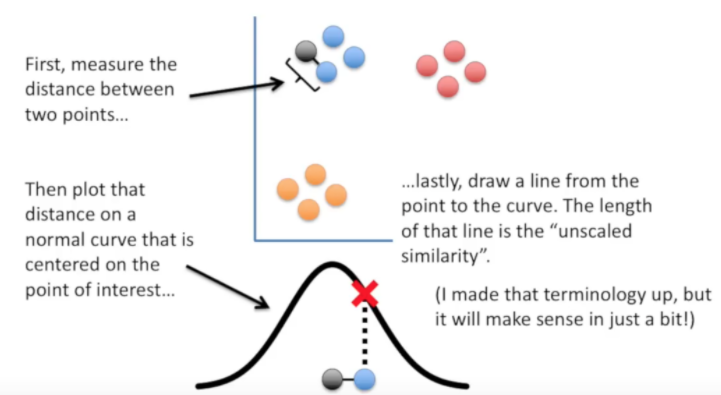

In [58]:
from sklearn.manifold import TSNE

np.random.seed(0)
# t-SNE 모델 생성 및 학습

tsne = TSNE(random_state=0,learning_rate=200, init='random')

glove_500_matrix = glove_value_df_500.values
glove_500_tsne_result = tsne.fit_transform(glove_500_matrix)

# 맵핑된 결과물에 원래의 레이블을 달아보자
df_glove_500_tsne_result =  pd.DataFrame(
    glove_500_tsne_result, columns=['V1', 'V2'], index = glove_value_df_500.index
    )



In [59]:
df_glove_500_tsne_result.index[:50]

Index(['등', '일', '것', '년', '수', '지역', '원', '사업', '월', '명', '만', '시', '지원', '말',
       '개', '중', '이', '광주', '억', '천', '교육', '이번', '계획', '운영', '추진', '진행', '기업',
       '시민', '문화', '도시', '한국', '전남', '시장', '대구', '대표', '센터', '의원', '주민', '참여',
       '지난해', '올해', '산업', '대회', '관련', '대', '사회', '대상', '시설', '제공', '예정'],
      dtype='object')

In [6]:
keyword_list1 = ['시장','대표','센터','의원','참여','지난해','올해']
keyword_list2 = ['이번','계획','운영','추진','진행','기업','문화',]
keyword_list3 = ['도시','대구','한국','전남','시민','주민',]
keyword_list = keyword_list1+keyword_list2+keyword_list3
df_glove_500_tsne_result.loc[keyword_list1,:]

,V1,V2
시장,-13.792979,-13.233589
대표,-1.859160,-16.391245
센터,3.010313,-18.132284
의원,-6.228569,-15.819917
참여,-6.742500,-2.707210
지난해,9.566513,-4.468809
올해,9.333705,-4.143648


In [5]:
#df_glove_500_tsne_result.to_csv('df_glove_500_tsne_result.csv',index=True)

df_glove_500_tsne_result = pd.read_csv('df_glove_500_tsne_result.csv',index_col=0)
df_glove_500_tsne_result.head()

,V1,V2
등,-11.183055,1.946738
일,12.007293,-5.751246
것,2.971051,6.865454
년,10.874143,-3.992116
수,3.147993,7.203326


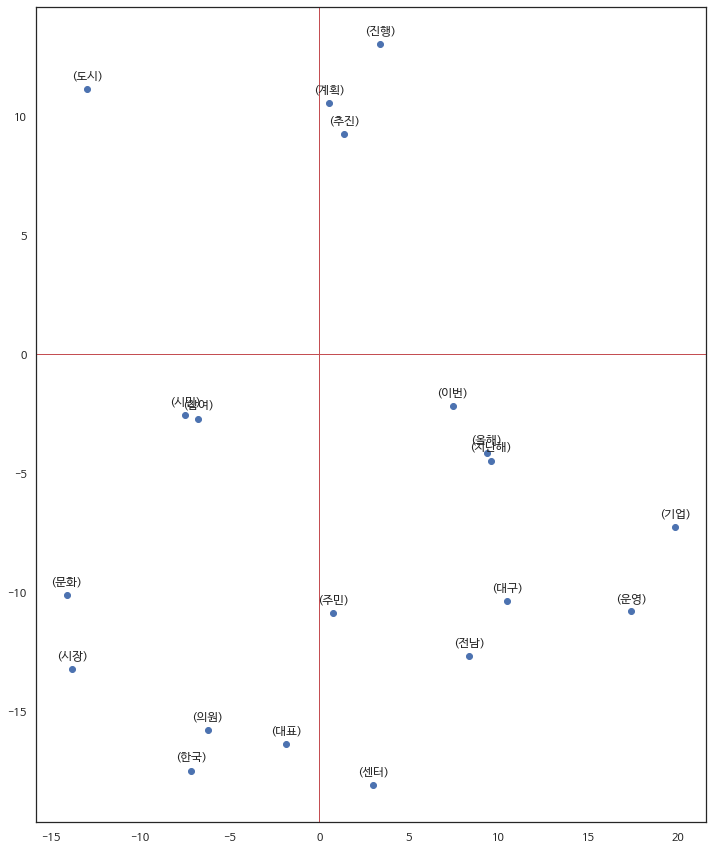

In [7]:
plt.figure(figsize=(12, 15))
plt.rc('font', family='NanumBarunGothic') 
plt.axhline(y=0, color='r', linewidth=1)
plt.axvline(x=0, color='r', linewidth=1)

part_df = df_glove_500_tsne_result.loc[keyword_list,:]
plt.scatter(part_df['V1'],part_df['V2'])
for keyword in keyword_list:
    label = f"({keyword})"
    plt.annotate(label,
                 (part_df.loc[keyword,'V1'],part_df.loc[keyword,'V2']),
                 textcoords="offset points",
                 xytext=(0,10),
                 ha='center')

> t-SNE 시각화 결과를 통해 glove의 임베딩이 꽤 잘 이루어졌음을 알 수 있다.

- (진행,추진,운영) => (진행,계획,추진)
- (지난해, 올해)
- (시민, 주민) => (시민,참여)